<a href="https://colab.research.google.com/github/ShrutiJain456/Encrypted/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

2.  Import and read the dataset

In [2]:
df = pd.read_csv("/content/Dataset.txt", sep = '\t')

3. EDA

In [3]:
df.shape

(101180, 24)

Our dataset comprises of 101180 rows and 24 columns. Since the features are encrypted there is no need to read the column names. Lets observe the class distribution.

In [4]:
class_dist = df['C'].value_counts()
print(class_dist)

C
0    76353
1    24827
Name: count, dtype: int64


In [5]:
df.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


separate the date columns from numerical ones

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [12]:
df["F15"] = pd.to_datetime(df["F15"])

In [13]:
df.set_index("F15", inplace=True)

In [14]:
feature = "F10"
ts = df[feature].dropna()

In [15]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary. Differencing required.")

adf_test(ts)

ADF Statistic: -68.61114237804993
p-value: 0.0
The series is stationary.


In [16]:
ts_diff = ts.diff().dropna()
adf_test(ts_diff)

ADF Statistic: -38.939101623770675
p-value: 0.0
The series is stationary.


In [17]:
model = ARIMA(ts, order=(1, 1, 1))  # ARIMA(p, d, q)
arima_model = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

In [18]:
forecast_steps = 30
forecast = arima_model.forecast(steps=forecast_steps)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


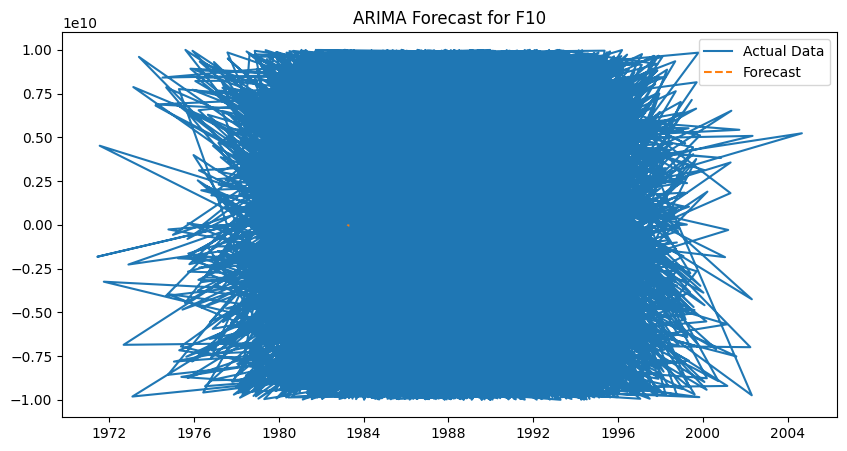

In [19]:
plt.figure(figsize=(10,5))
plt.plot(ts, label="Actual Data")
plt.plot(pd.date_range(ts.index[-1], periods=forecast_steps, freq="D"), forecast, label="Forecast", linestyle="dashed")
plt.legend()
plt.title("ARIMA Forecast for " + feature)
plt.show()